In [5]:
from textstat.textstat import textstat
import os
import csv
import time
import operator
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
csv.field_size_limit(1000000000)

131072

In [2]:
path = '/Users/noon/Desktop/new media 190/ao3/AO3Scraper/'
csv_names = [f for f in os.listdir(path) if '-fic.csv' in f]
csv_names = [f for f in csv_names if 'error' not in f]


In [31]:
readability_consensus("hello! my name is bob.")

NameError: name 'readability_consensus' is not defined

In [8]:
reading_levels = {}
reading_eases = {}
for csv_name in csv_names:
    print 'working on ', csv_name
    avg_reading_level = 0
    avg_reading_ease = 0
    no_fics = 0
    with open(path+csv_name, 'rb') as csvfile:
        rd = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in rd:
            try:
                fic_text = row[-1]
                reading_level = textstat.flesch_kincaid_grade(fic_text)
    #             print 'reading level is ', reading_level
                reading_ease = textstat.flesch_reading_ease(fic_text)
    #             print 'reading ease is ', reading_ease
                avg_reading_level += reading_level
                avg_reading_ease += reading_ease
                no_fics += 1
            except TypeError as e:
                print e, csv_name
                continue 
        print '---------'
        fin_lvl = avg_reading_level * 1.0 / no_fics
        fin_ease = avg_reading_ease * 1.0 / no_fics
        print 'for fandom ', csv_name, ' final level ', fin_lvl, ' ease ', fin_ease
        reading_levels[csv_name] = fin_lvl
        reading_eases[csv_name] = fin_ease

working on  camerica-fic.csv
Error(ASyPW): Number of words are zero, cannot divide
unsupported operand type(s) for *: 'float' and 'NoneType' camerica-fic.csv
---------
for fandom  camerica-fic.csv  final level  5.31376518219  ease  81.5391902834
working on  deathnote-fic.csv
---------
for fandom  deathnote-fic.csv  final level  5.59917355372  ease  80.790785124
working on  dragonage-fic.csv
---------
for fandom  dragonage-fic.csv  final level  5.372  ease  80.90004
working on  drwho-fic.csv
---------
for fandom  drwho-fic.csv  final level  5.08947368421  ease  81.5267611336
working on  falloutboy-fic.csv
---------
for fandom  falloutboy-fic.csv  final level  5.63654618474  ease  81.2263052209
working on  free-fic.csv
---------
for fandom  free-fic.csv  final level  6.2438247012  ease  76.8557768924
working on  got-fic.csv
---------
for fandom  got-fic.csv  final level  5.29879032258  ease  82.3839516129
working on  gravityfalls-fic.csv
---------
for fandom  gravityfalls-fic.csv  final 

In [9]:
cat_colors = {
    'M/M' : '#FF5E00',
    'F/F' : '#F252E0',
    'F/M' : '#3E8BF0',
    'Gen' : '#7070D3',
    'Other' : '#353333',
    'Multi' : '#7070D3',
}
fandom_categories = {
    'yurionice' : 'anime',
    'zootopia' : 'animated',
    'sherlock' : 'television',
    'hanni' : 'television',
    'ouat' : 'television',
    'korra' : 'animated',
    'merlin' : 'television',
    'shameless' : 'television',
    'mob' : 'anime',
    'startrek' : 'television',
    'onedirection' : 'real people',
    'twd' : 'television',
    'camerica' : 'comics',
    'spn' : 'television',
    'rpf' : 'real people',
    'haikyuu' : 'anime',
    'snk' : 'anime',
    'free' : 'anime',
    'deathnote' : 'anime',
    'marvel' : 'comics',
    'vgrpf' : 'real people',
    'hobbit' : 'movies',
    'starwars' : 'movies',
    'kpop' : 'real people',
    'hp' : 'literature',
    'hetalia' : 'anime',
    'falloutboy' : 'real people',
    'torchwood' : 'television',
    'hhamilton' : 'literature',
    'naruto' : 'anime',
    'drwho' : 'television',
    'stevenuniverse' : 'animated',
    'knb' : 'anime',
    'homestuck' : 'videogames/internet',
    'got' : 'television',
    'dragonage' : 'videogames/internet',
    'undertale' : 'videogames/internet',
    'shield' : 'comics',
    'teenwolf' : 'television',
    'gravityfalls' : 'animated'
}
overall_categories = {
    'anime' : '#ff002a',
    'television' : '#BEF115',
    'movies' : '#1DF216',
    'animated' : '#F2A116',
    'real people' : '#BF16F2',
    'comics' : '#1667F2',
    'literature' : '#4AC276',
    'videogames/internet' : '#16EBF2',
}

In [10]:
def plot_graph(slist, title):
    names = [s[0][:-8] for s in slist]
    val = [s[1] for s in slist]
    x_pos = np.arange(len(names)) 
    barlist = plt.bar(x_pos, val, align='center')
    for bar, fandom in zip(barlist, names):
        cat = fandom_categories[fandom]
        color = overall_categories[cat]
        bar.set_color(color)
    plt.xticks(x_pos, names, rotation=90) 
    plt.title(title)
    plt.show()

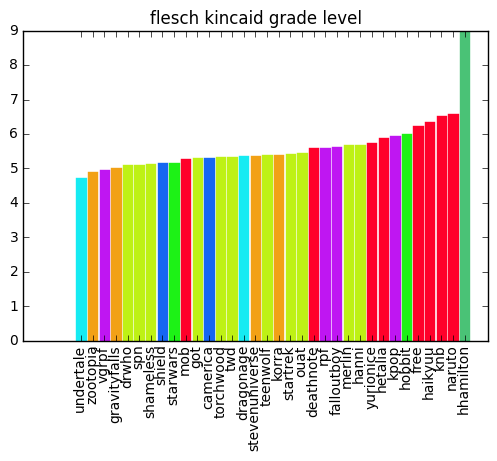

In [14]:
plot_graph(levels_sorted, 'flesch kincaid grade level')

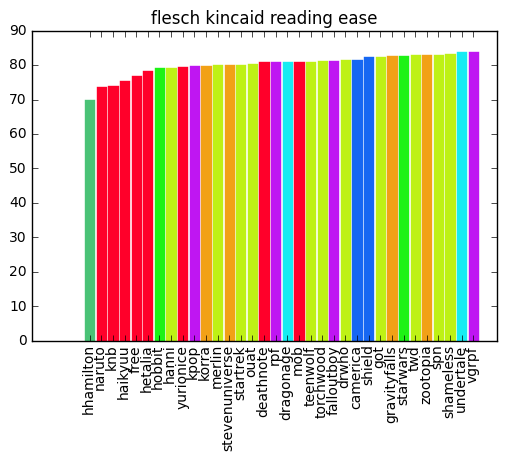

In [15]:
plot_graph(eases_sorted, 'flesch kincaid reading ease')

In [12]:
levels_sorted = sorted(reading_levels.items(), key=operator.itemgetter(1))
print levels_sorted

[('undertale-fic.csv', 4.7136000000000005), ('zootopia-fic.csv', 4.890322580645161), ('vgrpf-fic.csv', 4.951200000000003), ('gravityfalls-fic.csv', 5.006374501992033), ('drwho-fic.csv', 5.089473684210532), ('spn-fic.csv', 5.1072580645161265), ('shameless-fic.csv', 5.122267206477732), ('shield-fic.csv', 5.145344129554658), ('starwars-fic.csv', 5.152400000000001), ('mob-fic.csv', 5.270325203252035), ('got-fic.csv', 5.298790322580646), ('camerica-fic.csv', 5.313765182186237), ('torchwood-fic.csv', 5.342741935483871), ('twd-fic.csv', 5.344621513944226), ('dragonage-fic.csv', 5.372000000000001), ('stevenuniverse-fic.csv', 5.375100401606426), ('teenwolf-fic.csv', 5.3960000000000035), ('korra-fic.csv', 5.402811244979929), ('startrek-fic.csv', 5.408870967741935), ('ouat-fic.csv', 5.453225806451609), ('deathnote-fic.csv', 5.599173553719007), ('rpf-fic.csv', 5.599999999999998), ('falloutboy-fic.csv', 5.636546184738962), ('merlin-fic.csv', 5.669721115537846), ('hanni-fic.csv', 5.683200000000002),

In [13]:
eases_sorted = sorted(reading_eases.items(), key=operator.itemgetter(1))
print eases_sorted

[('hhamilton-fic.csv', 69.75829959514168), ('naruto-fic.csv', 73.65720647773277), ('knb-fic.csv', 74.06257028112451), ('haikyuu-fic.csv', 75.49519999999998), ('free-fic.csv', 76.85577689243023), ('hetalia-fic.csv', 78.17477911646587), ('hobbit-fic.csv', 79.03604838709683), ('hanni-fic.csv', 79.30671999999997), ('yurionice-fic.csv', 79.42303999999996), ('kpop-fic.csv', 79.73799180327869), ('korra-fic.csv', 79.74987951807223), ('merlin-fic.csv', 80.05741035856575), ('stevenuniverse-fic.csv', 80.12755020080317), ('startrek-fic.csv', 80.18850806451614), ('ouat-fic.csv', 80.39310483870968), ('deathnote-fic.csv', 80.79078512396691), ('rpf-fic.csv', 80.83091999999999), ('dragonage-fic.csv', 80.90003999999996), ('mob-fic.csv', 80.94577235772347), ('teenwolf-fic.csv', 81.03935999999997), ('torchwood-fic.csv', 81.09459677419353), ('falloutboy-fic.csv', 81.22630522088352), ('drwho-fic.csv', 81.5267611336032), ('camerica-fic.csv', 81.53919028340077), ('shield-fic.csv', 82.32983805668013), ('got-fi

In [41]:
import nltk

In [44]:
#get verbs
num_verbs = {}
for csv_name in csv_names:
    print 'working on ', csv_name
    fic_text = ""
    with open(path+csv_name, 'rb') as csvfile:
        rd = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in rd:
            fic_text += row[-1]
        print 'calculating...'
        start = time.time()
        tokens = nltk.word_tokenize(fic_text.lower())
        text = nltk.Text(tokens)
        tagged = nltk.pos_tag(text)
        counts = Counter(tag for word,tag in tagged)
        print 'counts are ', counts
        
#         total = sum(counts.values())
#         normalized = dict((word, float(count)/total) for word,count in counts.items())

#         reading_level = textstat.flesch_kincaid_grade(fic_text)
#         print 'reading level is ', reading_level
        end = time.time()
        dur = end - start
        print 'that took' , dur
 

working on  camerica-fic.csv
calculating...


KeyboardInterrupt: 